##Introduction

**Author**: Sipson Wegner Ngale


*This notebook implements the Data Science pipeline, where to perform exploratory data-driven analysis and acquire valuable insights from the british airways passengers reviews dataset, descriptive and predicitve data mining tasks need to be peformed*.

* https://www.kaggle.com/datasets/praveensaik/british-airways-passenger-reviews-2016-2023

# **British Airways Passenger Reviews (2016-2023)**
British Airways, one of the world's leading airlines, has been synonymous with excellence and reliability for decades. With a rich history and a commitment to providing exceptional customer experiences, British Airways continues to be a preferred choice for travelers worldwide.

The dataset comprises the following columns, each providing essential information extracted from the reviews:



In [ ]:
pip install category_encoders

In [ ]:
 # Importing the required libraries for the Task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
import category_encoders as ce
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_blobs

# we are using the scipy implementation
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent
from sklearn.preprocessing import LabelEncoder

from scipy.spatial.distance import cdist, pdist
np.set_printoptions(precision=5, suppress=True)

sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})

import warnings
warnings.filterwarnings("ignore")

Loading the dataset from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


setting de path to access it

In [ ]:
%cd /content/drive/MyDrive/DataMining/ICT4DEV_FINALPROJECT/

/content/drive/MyDrive/DataMining/ICT4DEV_FINALPROJECT


In [ ]:
dataset = pd.read_csv("British_Airway_Review.csv")

In [ ]:
dataset.head()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,✅ Trip Verified | I had the most fantastic BA...,1st August 2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,✅ Trip Verified | Couldn’t book in online. Ar...,31st July 2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,✅ Trip Verified | London Heathrow to Mumbai in...,31st July 2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,"✅ Trip Verified | Keflavík, Iceland to London ...",31st July 2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,✅ Trip Verified | Terrible Experience with Bri...,29th July 2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure


### **The dataset comprises the following columns, each providing essential information extracted from the reviews:**

**Reviews:** This column contains the text-based feedback and reviews provided by customers after their experience with British Airways.

**Date:** The date on which the review was posted by the customer, offering valuable temporal information.

**Stars:** The rating given by the traveler, typically on a scale of 1 to 5 stars, reflecting their overall satisfaction with the airline's services.

**Type of Traveler:** This column categorizes the type of traveler who left the review, distinguishing between different travel demographics, such as business travelers, families, or solo adventurers.

**Type of Seat:** Provides insights into the type of seat the traveler experienced during their flight, including economy, premium economy, business, or first class.

**Country:** Indicates the country of origin of the customer, allowing for regional analysis and understanding customer preferences.

**Recommended:** A binary indicator that reflects whether the traveler would recommend British Airways based on their experience.

**Route:** This column provides information about the specific route or flight taken by the passengers, offering context to their reviews and experiences.

**The dataset comprises 2500 review samples**

#Missing Values

In [ ]:
# looking for missing values and duplicated rows
new_dataset = (dataset.isnull().sum() / len(dataset)) * 100
new_dataset = new_dataset.drop(new_dataset[new_dataset == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :new_dataset})
missing_data.head(10)

,Missing Ratio


In [ ]:
duplicates = dataset[dataset.duplicated()].shape[0]
duplicates

0

The completeness score for this dataset scores for 100%, this means the dataset has no missing values or duplicated values
#Completeness 100%

---





# **Data Preparation**
In this section, i tried to perform a few data transformation techniques.
since there are trips that are not verified we can separete them, the flight routes are inconsistent some flights have the airport code others don't split the route in two new atributtes **from** and **to**

In [ ]:
# Create a different column "trip verified" to seperate them properly
dataset['trip_verified'] = np.where(dataset['reviews'].str.contains("Trip Verified"), 1, 0)

# Converting 'date' column to datetime
dataset['date'] = pd.to_datetime(dataset['date'])


locations = dataset['route'].str.split(" to ").tolist()
dataset[['from','to']] = pd.DataFrame(locations, index= dataset.index)

# List of airports codes to standardize the information in departure and arrival locations
airports = {
    "London": "LHR",
    "Heathrow": "LHR",
    "Las Vegas": "LAS",
    "Luanda": "LAD",
    "Denver": "DEN",
    "Rome": "FCO",
    "Gatwick": "LGW",
    "Venice": "VCE",
    "Tampa": "TPA",
    "Sydney": "SYD",
    "Bangkok": "BKK",
    "Cape Town": "CPT",
    "Bangalore": "BLR"
}

dataset.replace({"from": airports,
            "to": airports}, inplace=True)






# New snapshot of first 5 rows after transformation
dataset.tail()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller,trip_verified,from,to
2495,Roundtrip with British Airways from Bangkok to...,2015-11-12,Thailand,Business Class,no,7,BKK to LHR,Business,0,BKK,LHR
2496,Awful customer service. My wife and I have flo...,2015-11-11,United Kingdom,Business Class,no,3,London to Tampa,Couple Leisure,0,LHR,TPA
2497,I travelled from London to Sydney via Singapor...,2015-11-10,Australia,First Class,yes,5,London to Sydney,Couple Leisure,0,LHR,SYD
2498,British Airways have just moved Cape Town flig...,2015-11-10,United Kingdom,First Class,yes,3,LHR to CPT,Couple Leisure,0,LHR,CPT
2499,Bengaluru to Heathrow. My first long haul flig...,2015-11-10,India,Economy Class,no,3,BLR to LHR,Business,0,BLR,LHR


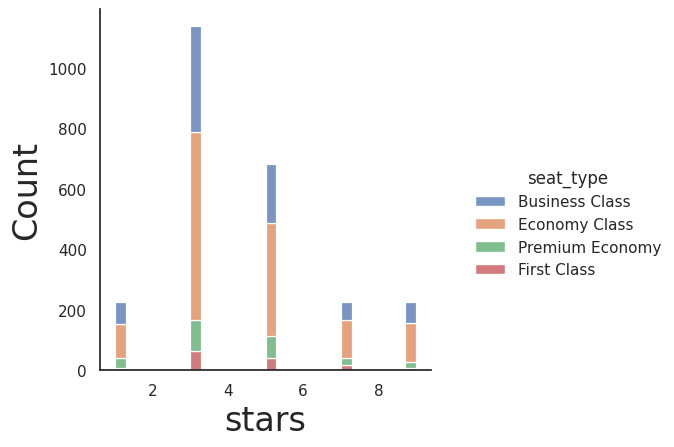

In [ ]:
sns.displot(data=dataset, x="stars", hue="seat_type", multiple="stack")

In [ ]:
sns.histplot(data=dataset, x="seat_type", hue="recommended", multiple="dodge", shrink=.8)

The seat_type, type_traveller, stars and recommmed collumns can be normalized

In [ ]:
# In the airline industry, seat pricing implies a given order.
# So, we will encode accordingly
seat_type_encoder= preprocessing.OrdinalEncoder(categories=[['Economy Class','Business Class','Premium Economy','First Class']])
stars_encoder = preprocessing.OrdinalEncoder(categories=[[1,3,5,7,9]])
column_stars =dataset[['stars']]
column_seat_type = dataset[['seat_type']]

encoded_stars =stars_encoder.fit_transform(column_stars)
encoded_seat_type=seat_type_encoder.fit_transform(column_seat_type)

dataset['seat_type']=encoded_seat_type
dataset['stars'] = encoded_stars

dataset.tail()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller,trip_verified,from,to
2495,Roundtrip with British Airways from Bangkok to...,2015-11-12,Thailand,1.0,no,3.0,BKK to LHR,Business,0,BKK,LHR
2496,Awful customer service. My wife and I have flo...,2015-11-11,United Kingdom,1.0,no,1.0,London to Tampa,Couple Leisure,0,LHR,TPA
2497,I travelled from London to Sydney via Singapor...,2015-11-10,Australia,3.0,yes,2.0,London to Sydney,Couple Leisure,0,LHR,SYD
2498,British Airways have just moved Cape Town flig...,2015-11-10,United Kingdom,3.0,yes,1.0,LHR to CPT,Couple Leisure,0,LHR,CPT
2499,Bengaluru to Heathrow. My first long haul flig...,2015-11-10,India,0.0,no,1.0,BLR to LHR,Business,0,BLR,LHR


<Axes: xlabel='date', ylabel='Count'>

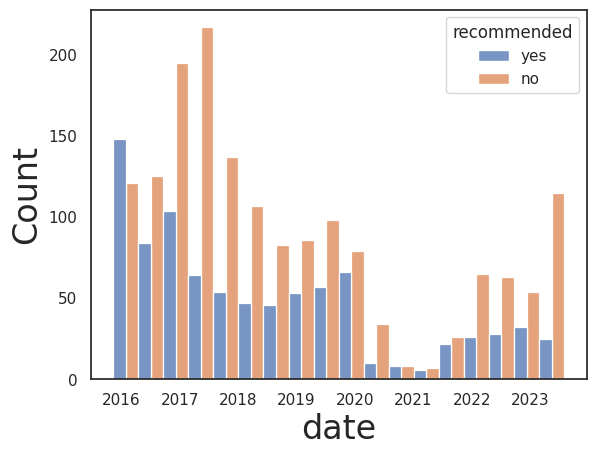

In [ ]:
sns.histplot(data=dataset, x="date", hue="recommended", multiple="dodge")

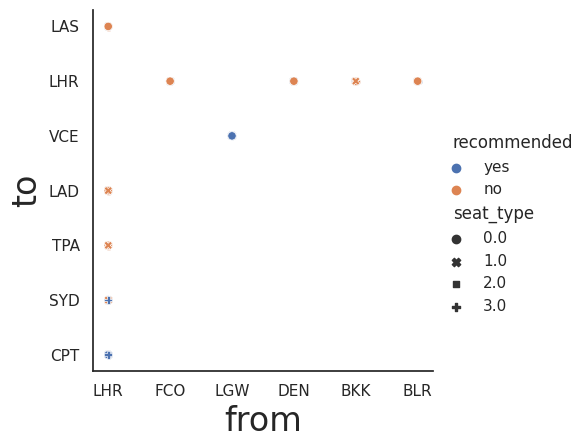

In [ ]:
sns.relplot(data=dataset, x="from", y="to", hue="recommended" , style="seat_type")

#Hierarchical Clustering

In [ ]:
def PlotDendrogram(Z, title=""):
    plt.figure(figsize=(25, 10))
    font = {'family' : 'sans', 'size'   : 18}
    plt.rc('font', **font)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Merge Distance')
    dendrogram(Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.xticks([])
    plt.show()

In [ ]:
def ComputeWSSBSS(X,Z,k_values=range(1,20)):
    wss_values = []
    bss_values = []

    for k in k_values:
        clustering = fcluster(Z, k, criterion='maxclust')
        frequency = np.bincount(clustering)
        index = np.nonzero(frequency)[0]

        centroids = [np.mean(X[clustering==c],axis=0) for c in index]

        cdist(X, centroids, 'euclidean')
        D = cdist(X, centroids, 'euclidean')
        cIdx = np.argmin(D,axis=1)
        d = np.min(D,axis=1)

        avgWithinSS = sum(d)/len(X)

        # Total with-in sum of square
        wss = sum(d**2)

        tss = sum(pdist(X)**2)/len(X)

        bss = tss-wss

        wss_values += [wss]
        bss_values += [bss]
    return wss_values,bss_values

In [ ]:
def PlotKneeElbow(bss_values,wss_values,k_values,title=""):
    fig = plt.figure()
    font = {'family' : 'sans', 'size'   : 12}
    plt.rc('font', **font)
    plt.plot(k_values, wss_values, 'o-', color='red', label='WSS')
    plt.plot(k_values, bss_values, 'o-', color='blue', label='BSS')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('BSS & WSS')
    plt.xticks(k_values)
    plt.legend()
    plt.title(title);

In [ ]:
dataset= dataset.drop('reviews',1)
dataset= dataset.drop('date',1)
dataset= dataset.drop('country',1)
dataset= dataset.drop('type_of_traveller',1)
dataset= dataset.drop('route',1)
dataset= dataset.drop('from',1)
dataset= dataset.drop('to',1)
c_dataset = dataset.drop('recommended',1)

dataset.head()

,seat_type,recommended,stars,trip_verified
0,1.0,yes,2.0,1
1,0.0,no,1.0,1
2,1.0,yes,1.0,1
3,1.0,yes,2.0,1
4,0.0,no,2.0,1


In [ ]:
target = "recommended"
input_variables = dataset.columns[dataset.columns!=target]

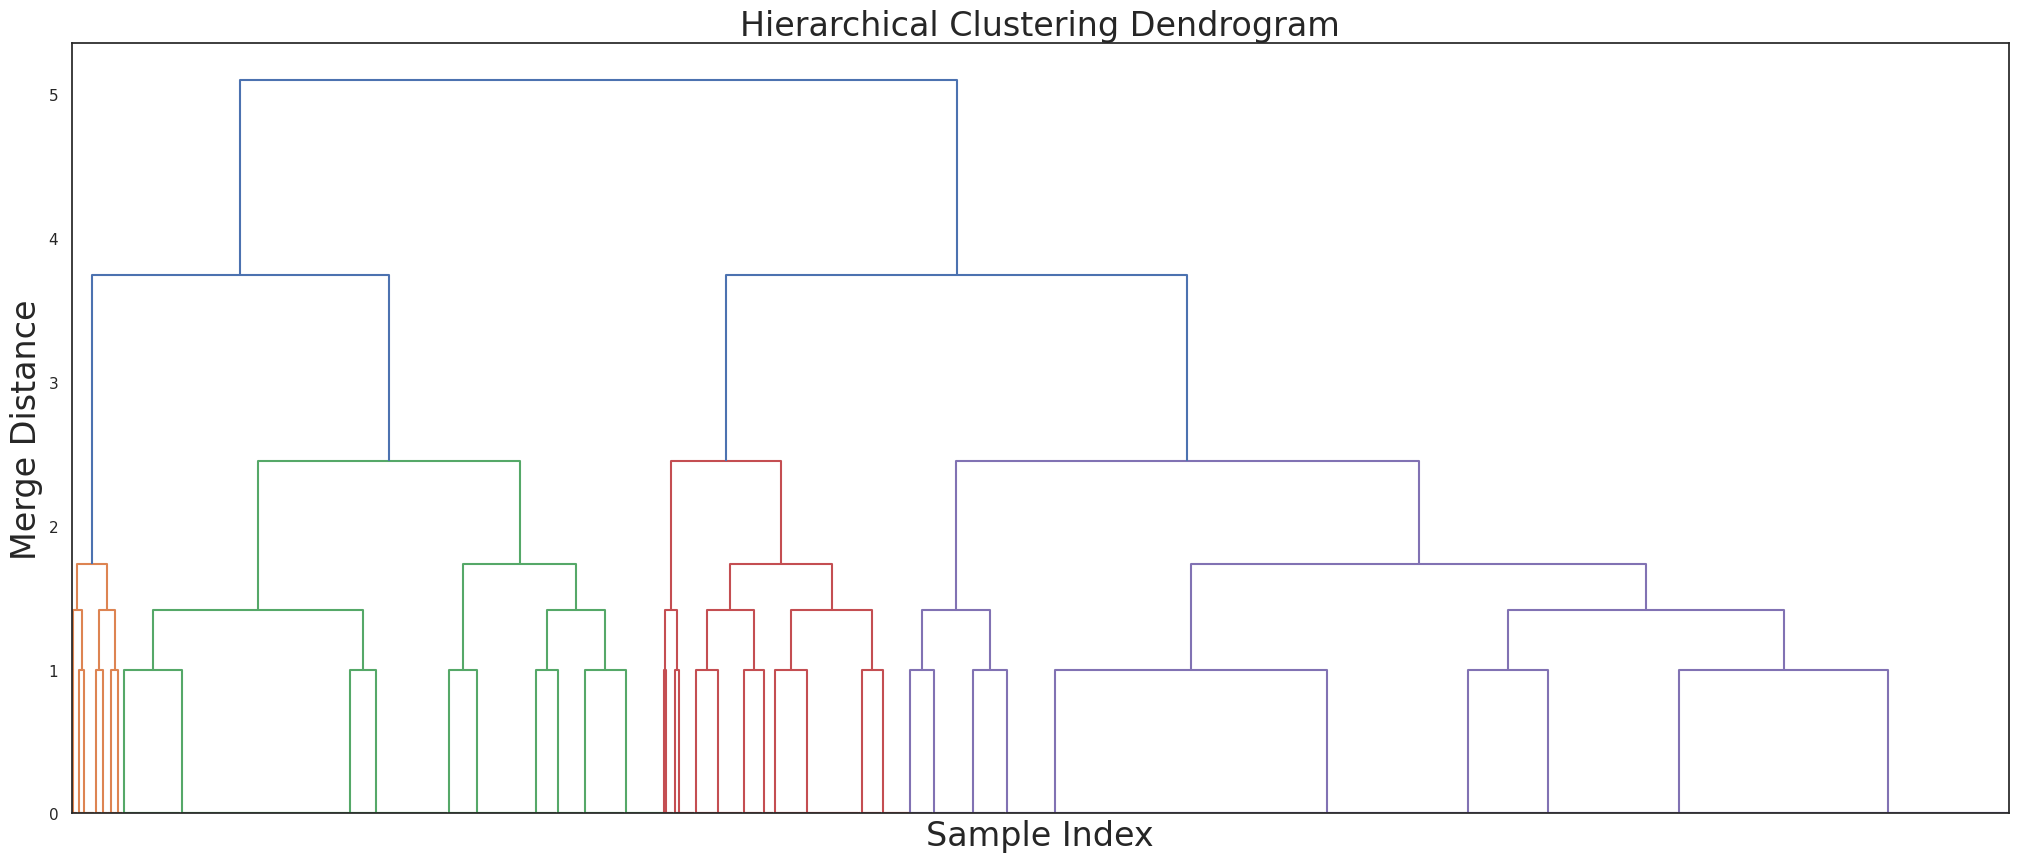

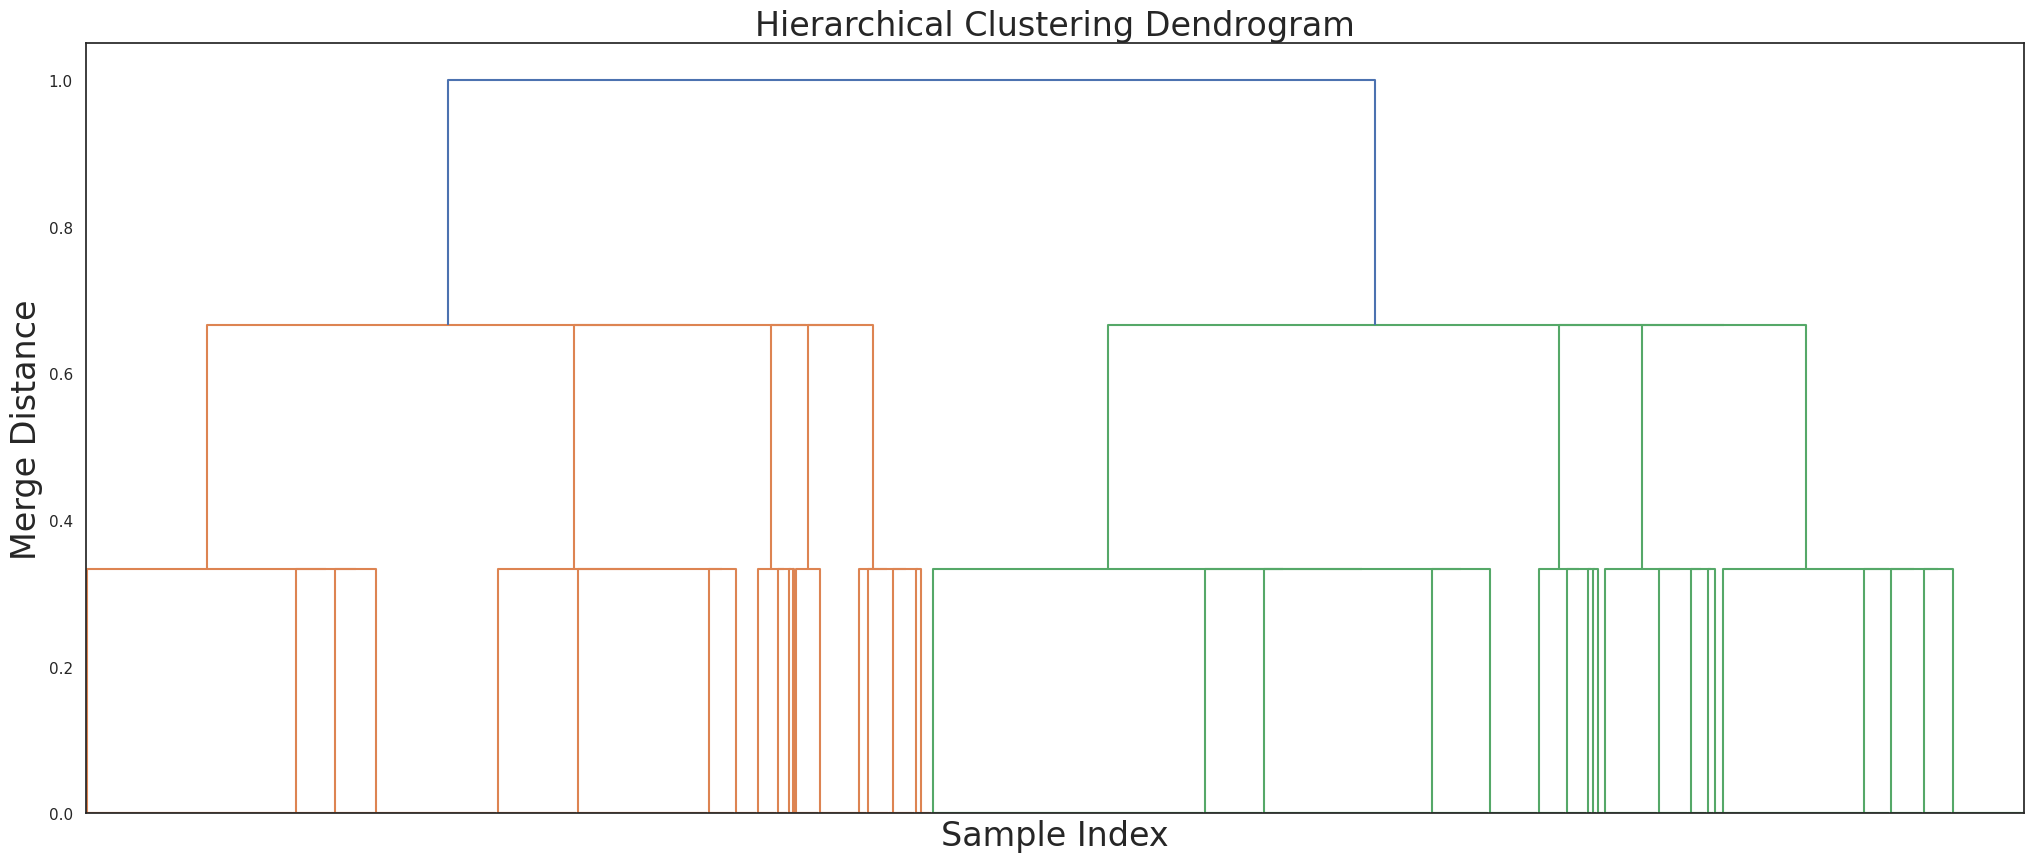

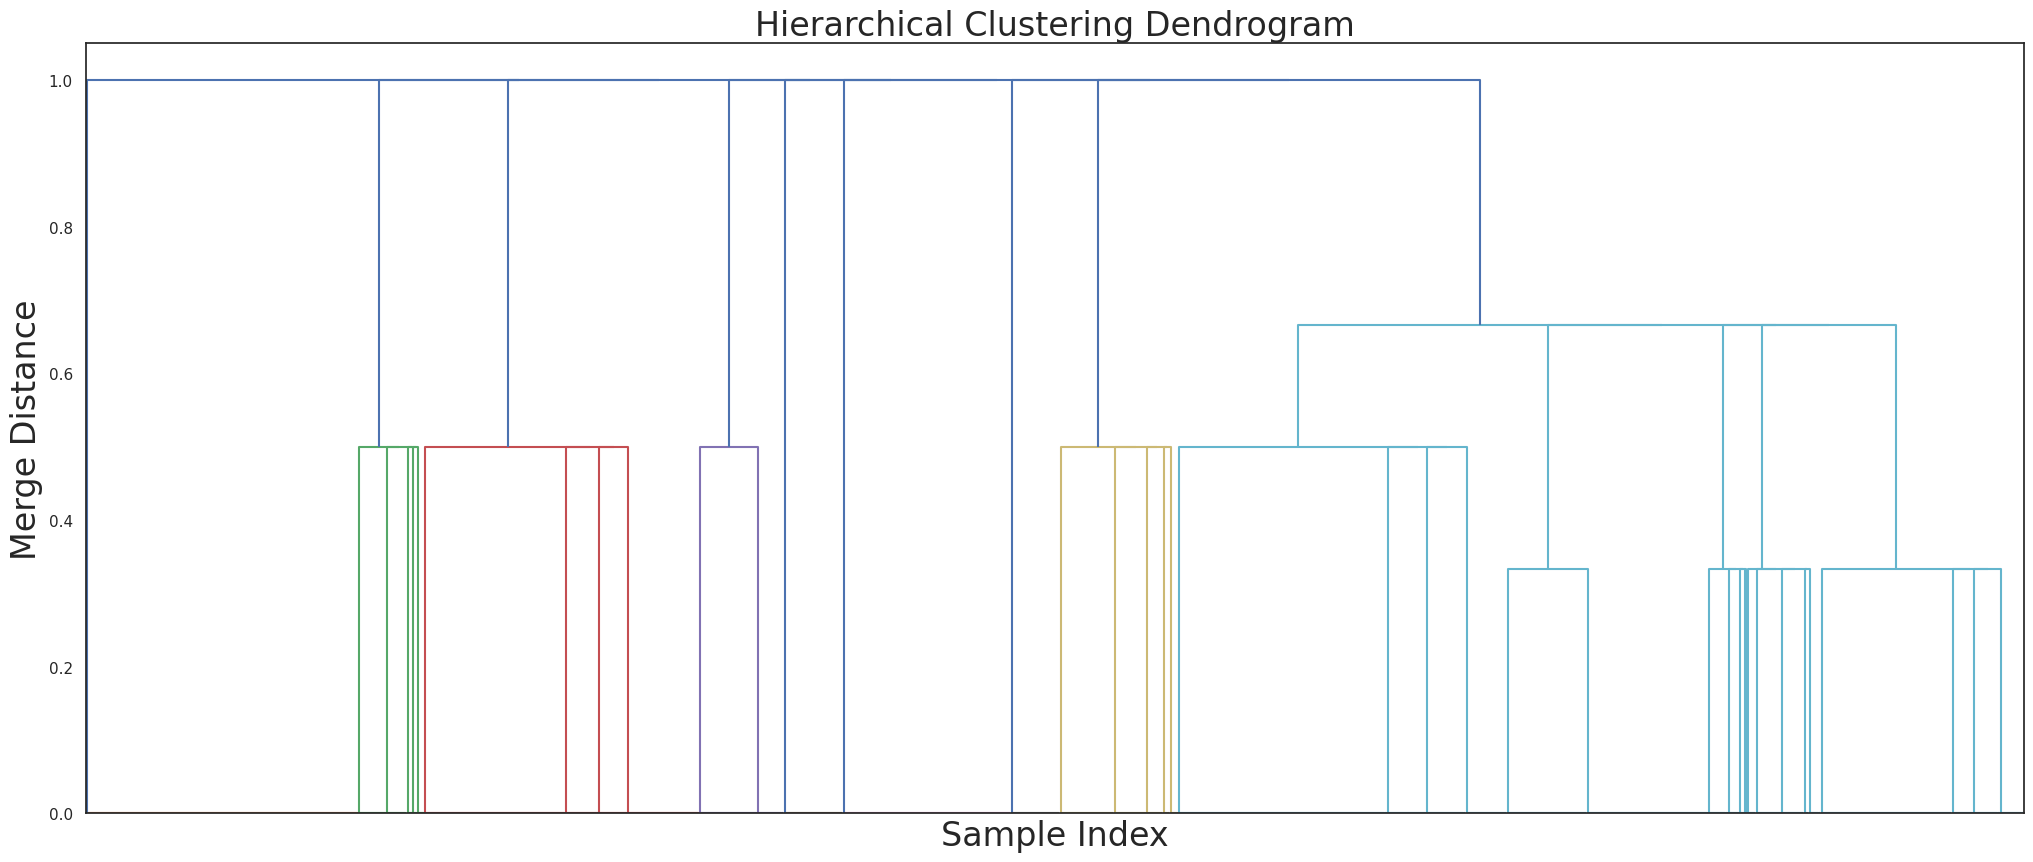

In [ ]:
Z = {}
Z['Euclidean'] = linkage(c_dataset, 'complete')
Z['Hamming'] = linkage(c_dataset, 'complete',metric='hamming')
Z['Jaccard'] = linkage(c_dataset, 'complete',metric='jaccard')

for key in Z.keys():
    PlotDendrogram(Z[key],key+' Distance')

In [ ]:
for k in range(1,10):
    print(str(fcluster(Z['Euclidean'], k , criterion='maxclust')))

[1 1 1 ... 1 1 1]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[4 4 4 ... 3 3 4]
[4 4 4 ... 3 3 4]
[4 4 4 ... 3 3 4]
[7 7 7 ... 5 5 7]
[7 7 7 ... 5 5 7]
[7 7 7 ... 5 5 7]


In [ ]:
wss = {}
bss = {}

for key in Z.keys():
    wss[key],bss[key] = ComputeWSSBSS(c_dataset,Z[key],range(1,20))

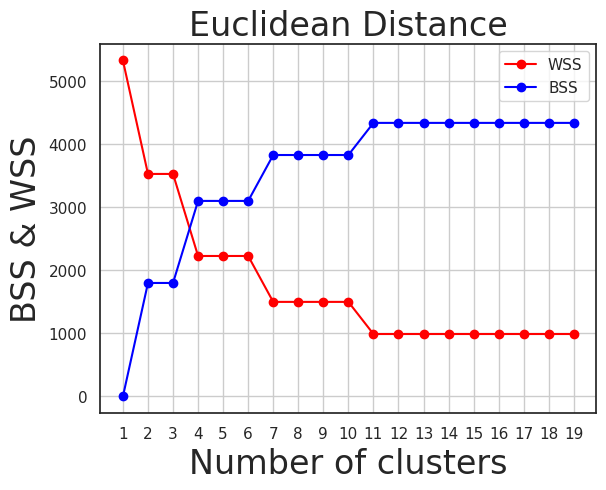

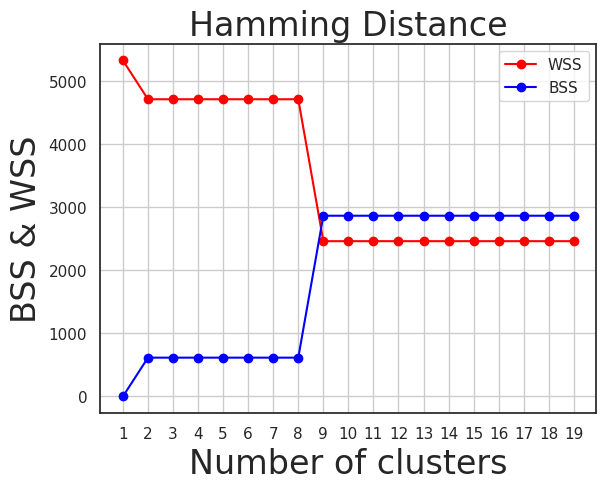

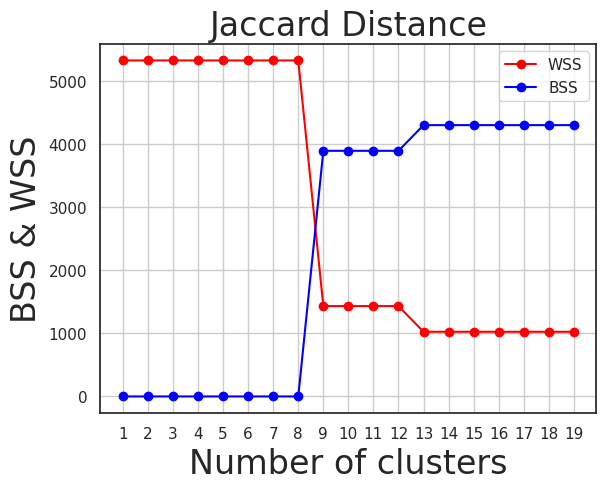

In [ ]:
for key in Z.keys():
    PlotKneeElbow(bss[key],wss[key],range(1,20),key+' Distance')